# Decision Tree Classification: Example Problem

## Problem Statement

Predict whether a person will buy a car based on their age, income, and marital status.

---

## Dataset

| Age | Income       | Married | Will Buy |
|-----|--------------|---------|----------|
| 25  | Low          | No      | No       |
| 30  | Medium       | Yes     | Yes      |
| 35  | High         | Yes     | Yes      |
| 40  | Low          | No      | No       |
| 45  | Medium       | Yes     | Yes      |

---

## Import needed Libraries

In [31]:
import os

os.system('pip install numpy')
os.system('pip install matplotlib')
os.system('pip install scikit-learn')
os.system('pip install pandas')

0

In [32]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import tree
import matplotlib.pyplot as plt

## Create the Data set

In [33]:
# Create the dataset
# Create the dataset
data = {
    "Age": [25, 30, 35, 40, 45, 28, 32, 50, 38, 42],
    "Income": ["Low", "Medium", "High", "Low", "Medium", "Medium", "High", "Low", "High", "Medium"],
    "Married": ["No", "Yes", "Yes", "No", "Yes", "No", "Yes", "No", "No", "Yes"],
    "Will Buy": ["No", "Yes", "Yes", "No", "Yes", "No", "Yes", "No", "Yes", "Yes"]
}

# Convert the dataset to a DataFrame
df = pd.DataFrame(data)

## Do some data preprocessing

In [34]:
# Preprocess categorical features (convert to numeric)
df["Income"] = df["Income"].map({"Low": 0, "Medium": 1, "High": 2})
df["Married"] = df["Married"].map({"No": 0, "Yes": 1})
df["Will Buy"] = df["Will Buy"].map({"No": 0, "Yes": 1})

## Create the Training and validation data sets

In [35]:
# Separate features and target
X = df[["Age", "Income", "Married"]]
y = df["Will Buy"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print training and testing data
print(df)

print("\nTraining Data:\n", X_train)

print("\nTesting Data:\n", X_test)

   Age  Income  Married  Will Buy
0   25       0        0         0
1   30       1        1         1
2   35       2        1         1
3   40       0        0         0
4   45       1        1         1
5   28       1        0         0
6   32       2        1         1
7   50       0        0         0
8   38       2        0         1
9   42       1        1         1

Training Data:
    Age  Income  Married
5   28       1        0
0   25       0        0
7   50       0        0
2   35       2        1
9   42       1        1
4   45       1        1
3   40       0        0
6   32       2        1

Testing Data:
    Age  Income  Married
8   38       2        0
1   30       1        1


## Create the model

In [36]:
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3, random_state=42)

# Train the model

In [37]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=42)

# Run the model and make predictions

In [38]:
# Make predictions on the test set
y_pred = clf.predict(X_test)

## Evaluate the model

In [39]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.50


## Visualize the result

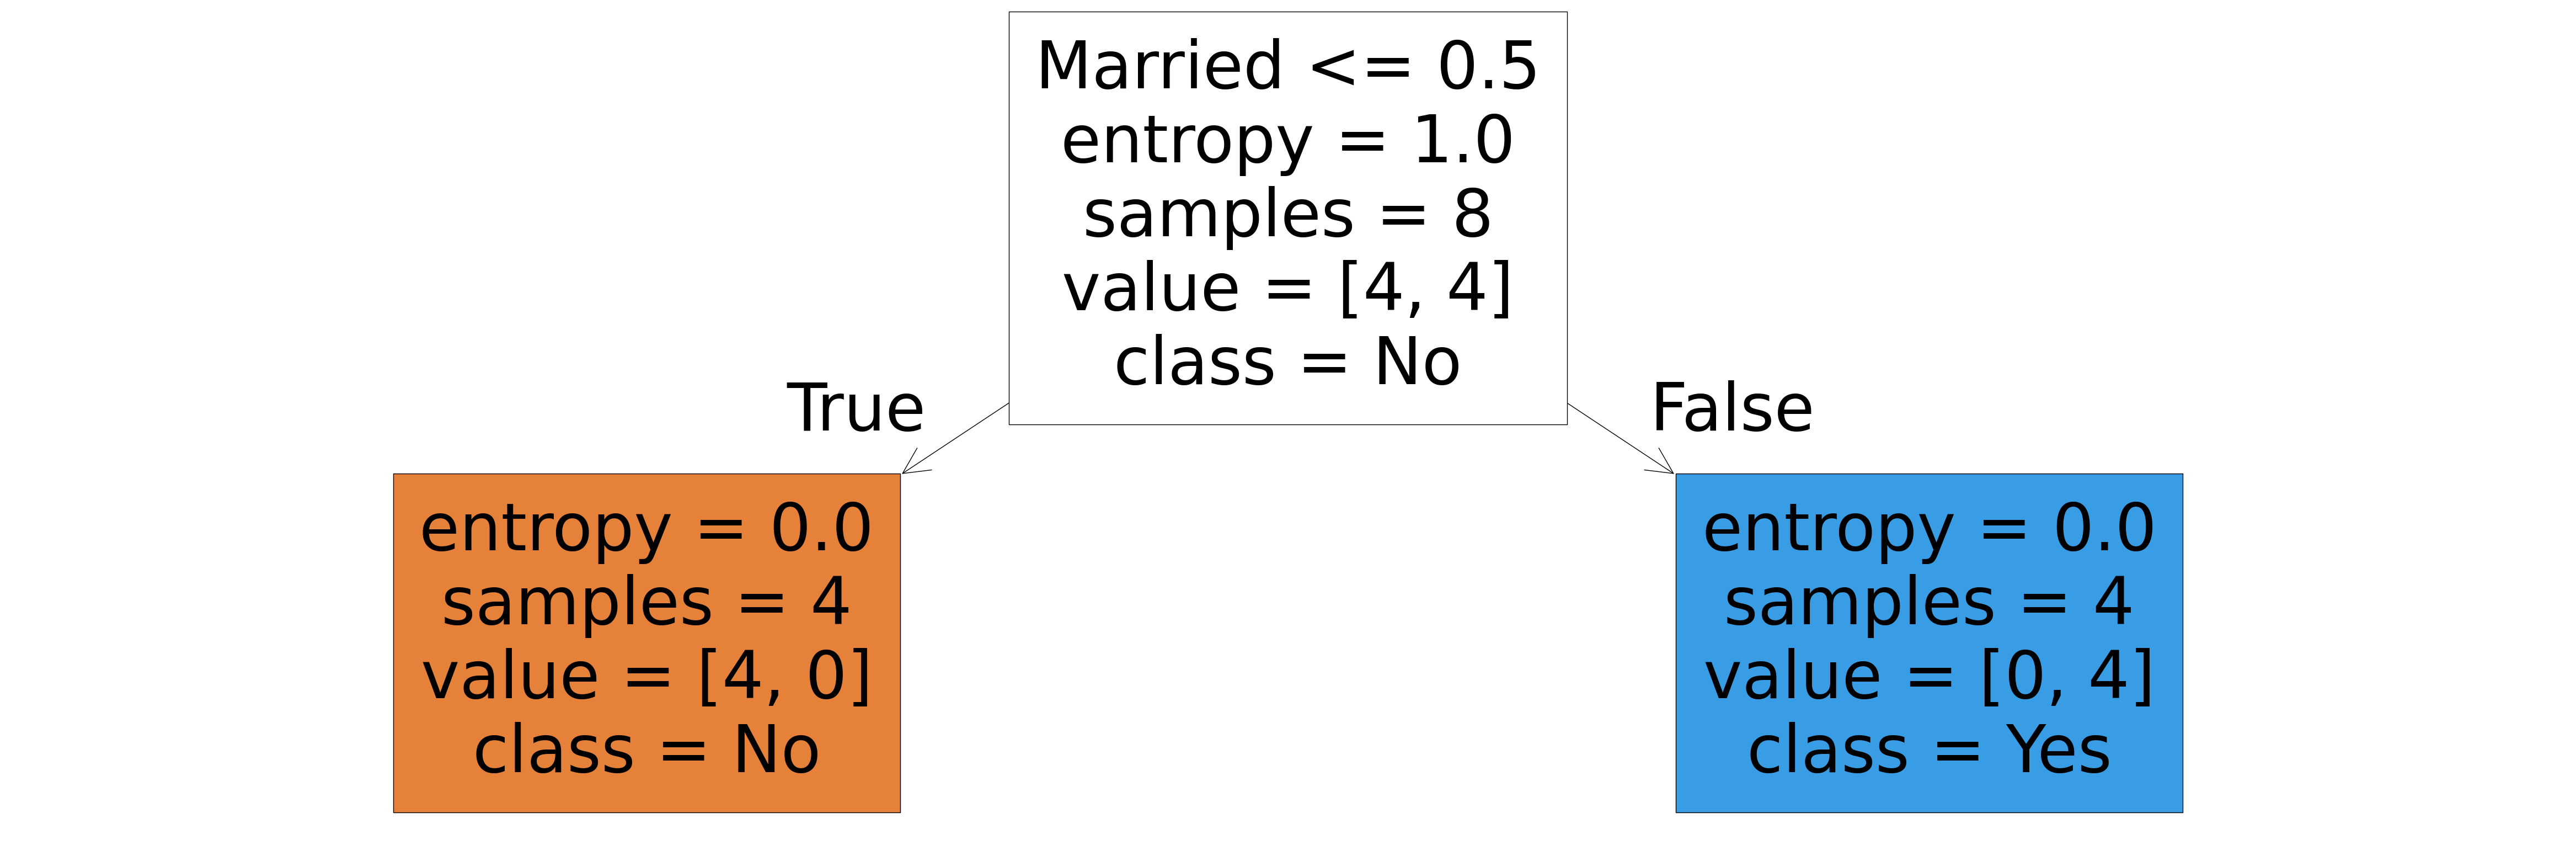

In [40]:
# Visualize the decision tree
plt.figure(figsize=(60, 20))
tree.plot_tree(clf, feature_names=["Age", "Income", "Married"], class_names=["No", "Yes"], filled=True)
plt.show()

## Test the code with a random input

In [41]:
# Example prediction
new_data = [[32, 1, 1]]  # Age: 32, Income: Medium, Married: Yes
prediction = clf.predict(new_data)
print(f"Prediction (Will Buy): {'Yes' if prediction[0] == 1 else 'No'}")

Prediction (Will Buy): Yes


/home/mwahdan/AASTMT/CC511-Introduction-To-Artificial-Intelligence-Section-Codes/.venv/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
